103.4301408
103
96.96670344
96


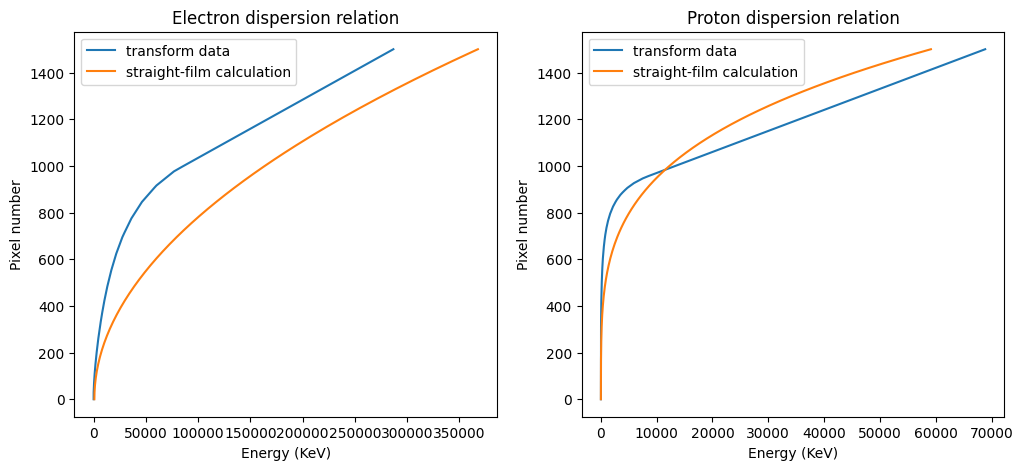

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

def lineout(array, w1, w2):
    width = np.shape(array)[0]
    length = np.shape(array)[1]
    line_data = array[w2,:]
    for i in range(length):
        line_data[i] = (1/(w2+1-w1))*np.sum(array[w1:w2+1,i])
    return line_data

def theoretical_dispersion(x,A,d):
    energy = A*(x**2+d**2)**2
    return energy

def theoretical_dispersion_relativistic_e(x,a,D):
    m = 9.1*10**-31
    c = 3*10**8
    E = m*c**2
    eV = 1.6*10**-19
    energy = (1/1000)*(1/eV)*0.5*(-E+np.sqrt(E**2+((eV*0.87*c)**2)*(1/D)*((((x-a)**2)+D)**2)))
    return energy

def theoretical_dispersion_relativistic_p(x,a,D):
    m = 1.67*10**-27
    c = 3*10**8
    E = m*c**2
    eV = 1.6*10**-19
    energy = (1/1000)*(1/eV)*0.5*(-E+np.sqrt(E**2+((eV*0.87*c)**2)*(1/D)*((((x-a)**2)+D)**2)))
    return energy

energy_data_protons = np.loadtxt('NEPPS_Dispersion_Protons_087T.txt', skiprows=1)
energy_data_electrons = np.loadtxt('NEPPS_Dispersion_Electrons_087T.txt', skiprows=1)

def linear_fit(x,m,c):
    y = m*x+c
    return y

def transform_electron_axis(x, R):
    energy = np.zeros(len(x))
    start = energy_data_electrons[-1,1]
    print(start)
    for i in range(len(x)):
        if np.abs((1/R)*x[i]-start) == np.min(np.abs((1/R)*x-start)):
            index = i
    print(index)
    energy[0:index] = np.interp((1/R)*x[0:index],np.array(energy_data_electrons[:,1]),np.array(energy_data_electrons[:,0]))

    deltax = energy_data_electrons[-1,1]-energy_data_electrons[-2,1]

    deltaE = energy_data_electrons[-1,0]-energy_data_electrons[-2,0]

    grad = deltaE/deltax

    intercept = energy_data_electrons[-1,0] - grad*energy_data_electrons[-1,1]

    energy[index:] = linear_fit((1/R)*x[index:], grad, intercept)

    return energy

def transform_proton_axis(x, R):
    energy = np.zeros(len(x))
    start = energy_data_protons[-1,1]
    print(start)
    for i in range(len(x)):
        if np.abs((1/R)*x[i]-start) == np.min(np.abs((1/R)*x-start)):
            index = i
    print(index)
    energy[0:index] = np.interp((1/R)*x[0:index],np.array(energy_data_protons[:,1]),np.array(energy_data_protons[:,0]))

    deltax = energy_data_protons[-1,1]-energy_data_protons[-2,1]

    deltaE = energy_data_protons[-1,0]-energy_data_protons[-2,0]

    grad = deltaE/deltax

    intercept = energy_data_protons[-1,0] - grad*energy_data_protons[-1,1]

    energy[index:] = linear_fit((1/R)*x[index:], grad, intercept)

    return energy


def find_index(axis,start,end):
    for i in range(len(axis)):
        if np.abs(axis[i]-start) == np.min(np.abs(axis-start)):
            start_i = i

    for i in range(len(axis)):
        if np.abs(axis[i]-end) == np.min(np.abs(axis-end)):
            end_i = i
    return start_i, end_i


r = 10

x_axis = np.linspace(0,1500,150)


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(transform_electron_axis(x_axis,10),x_axis,label='transform data')
axs[0].plot(theoretical_dispersion_relativistic_e((1/10000)*x_axis,0.0,0.008**2),x_axis,label='straight-film calculation')
axs[0].set_xlabel("Energy (KeV)")
axs[0].set_ylabel("Pixel number")
axs[0].set_title("Electron dispersion relation")
axs[0].legend()

axs[1].plot(transform_proton_axis(x_axis,10),x_axis,label='transform data')
axs[1].plot(theoretical_dispersion_relativistic_p((1/10000)*x_axis,0.001,0.012**2),x_axis,label='straight-film calculation')
axs[1].set_xlabel("Energy (KeV)")
axs[1].set_ylabel("Pixel number")
axs[1].set_title("Proton dispersion relation")
axs[1].legend()

ther_, pcov_ = curve_fit(theoretical_dispersion, energy_data_electrons[:,1], energy_data_electrons[:,0], p0=[0.0028,5])

energy = theoretical_dispersion((1/10)*x_axis, ther_[0], ther_[1])

#axs[0].plot(energy,x_axis)

C:\Users\rayne\AppData\Local\Temp\ipykernel_27912\1983042433.py:30: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(np.array([0, 125, 250, 375, 500, 717, 789]), np.array([0, 0, 0, 0, 0, 0.0204, 0.0784]), 8)


96.96670344
970
96.96670344
970
96.96670344
970
96.96670344
970


Text(0.5, 1.0, 'TR Proton PSL response')

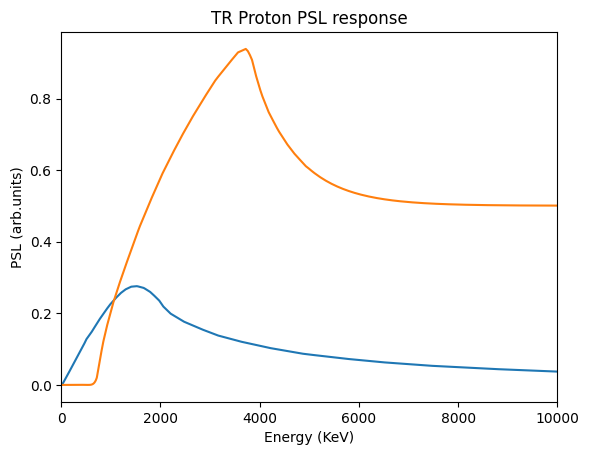

In [14]:
Proton_PSL_data = np.loadtxt('Proton_PSL_linylinx.txt', delimiter=',', skiprows=1)
Proton_PSL_data_low = np.loadtxt('Proton_PSL_low.txt', delimiter=',', skiprows=1)

TR_proton_energy_axis = 1000*Proton_PSL_data[:,0]
TR_proton_PSL_axis = Proton_PSL_data[:,1]

Proton_PSL_data = np.loadtxt('MS_Proton.txt', delimiter=',', skiprows=2)

MS_proton_energy_axis = 1000*Proton_PSL_data[:,0]
MS_proton_PSL_axis = Proton_PSL_data[:,1]

#plt.plot(TR_proton_energy_axis,TR_proton_PSL_axis)

#plt.plot(MS_proton_energy_axis,MS_proton_PSL_axis)

#plt.scatter(TR_proton_energy_axis,TR_proton_PSL_axis)

def find_exp_shift(E, A, a, shift):
    func = (A*np.exp(-a*E))+shift
    return func

def find_poly(E, A, a, shift):
    func = (A*E)**a+shift
    return func

def TR_proton_PSL_scale(Espace):
    PSL = np.interp(Espace,TR_proton_energy_axis,TR_proton_PSL_axis)
    return PSL

coefficients = np.polyfit(np.array([0, 125, 250, 375, 500, 717, 789]), np.array([0, 0, 0, 0, 0, 0.0204, 0.0784]), 8)

x = np.linspace(0,800,50)

poly_fit_MS = np.poly1d(coefficients)

#plt.plot(x,poly_fit_MS(x))

t_2, p_2 = curve_fit(find_exp_shift, np.linspace(4000,5000,100), np.interp(np.linspace(4000,5000,100),MS_proton_energy_axis,MS_proton_PSL_axis), p0=(1,0.0001,0.4))

fit_2 = find_exp_shift(np.linspace(4000,10000,100), t_2[0], t_2[1], t_2[2])

def MS_proton_PSL_scale(Espace):

    t_2, p_2 = curve_fit(find_exp_shift, np.linspace(4000,5000,100), np.interp(np.linspace(4000,5000,100),MS_proton_energy_axis,MS_proton_PSL_axis), p0=(1,0.0001,0.4))

    fit_2 = find_exp_shift(np.linspace(4000,10000,100), t_2[0], t_2[1], t_2[2])

    PSL = np.zeros(len(Espace))
    start = MS_proton_energy_axis[0]
    end = MS_proton_energy_axis[-1]
    
    for i in range(len(Espace)):
        if np.abs(Espace[i]-start) == np.min(np.abs(Espace-start)):
            start_index = i

    for i in range(len(Espace)):
        if np.abs(Espace[i]-end) == np.min(np.abs(Espace-end)):
            end_index = i

    PSL[start_index:end_index] = np.interp(Espace[start_index:end_index],MS_proton_energy_axis,MS_proton_PSL_axis)
    #PSL[:start_index] = MS_proton_PSL_axis[0]
    PSL[:start_index] = poly_fit_MS(Espace[:start_index])
    PSL[end_index:] = np.interp(Espace[end_index:],np.linspace(4000,10000,100),fit_2)

    return PSL

def find_exp(E, A, a):
    func = (A*np.exp(-a*E))
    return func

def find_2exp(E, A, a, B, b):
    func = func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))
    return func

def find_exp_proton(E, A, a, shift):
    func = (A*np.exp(-a*E))*TR_proton_PSL_scale(E)+shift
    return func

def find_2exp_proton(E, A, a, B, b, shift):
    func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))*TR_proton_PSL_scale(E)+shift
    return func


plt.plot(transform_proton_axis(x_axis,10),TR_proton_PSL_scale(transform_proton_axis(x_axis,10)))

plt.plot(transform_proton_axis(x_axis,10),MS_proton_PSL_scale(transform_proton_axis(x_axis,10)))

#plt.plot(np.linspace(4000,10000,100),find_exp_shift(np.linspace(4000,10000,100), t[0], t[1], t[2]))


#plt.plot(x, fit1)

plt.xlim(0,10000)
plt.xlabel("Energy (KeV)")
plt.ylabel("PSL (arb.units)")
plt.title("TR Proton PSL response")

Text(0.5, 1.0, 'MS Electron PSL response')

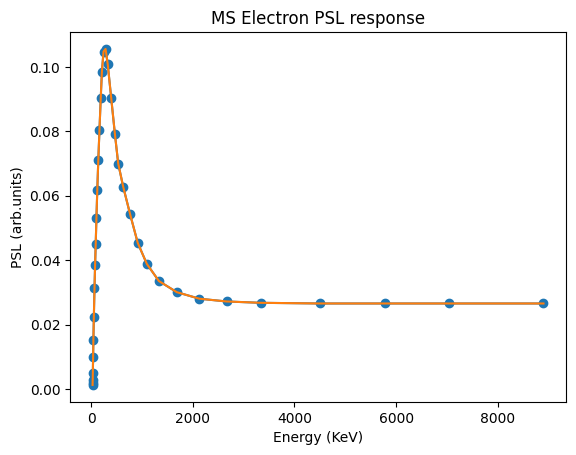

In [3]:
import numpy as np

MS_signal_data = np.loadtxt('MS_signal.txt', skiprows=1) # Adjust delimiter if needed
MS_energy_axis = 1000*MS_signal_data[:,0]
MS_PSL_axis = MS_signal_data[:,1]

plt.plot(MS_energy_axis,MS_PSL_axis)

def MS_PSL_scale(Espace):
    PSL = np.interp(Espace,MS_energy_axis,MS_PSL_axis)
    return PSL

def find_exp_electron(E, A, a, shift):
    func = (A*np.exp(-a*E))*MS_PSL_scale(E)+shift
    return func

def find_2exp_electron(E, A, a, B, b, shift):
    func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))*MS_PSL_scale(E)+shift
    return func

# Assuming your text file is named 'data.txt' and contains a 2D array
energy_data = np.loadtxt('Electron_Dispersion_Z_vs_Ebeam_0028T.txt', skiprows=8) # Adjust delimiter if needed

MS_signal_data = np.loadtxt('MS_signal.txt', skiprows=1) # Adjust delimiter if needed
MS_energy_axis = 1000*MS_signal_data[:,0]
MS_PSL_axis = MS_signal_data[:,1]

plt.plot(MS_energy_axis,MS_PSL_axis)
plt.scatter(MS_energy_axis,MS_PSL_axis)
plt.xlabel("Energy (KeV)")
plt.ylabel("PSL (arb.units)")
plt.title("MS Electron PSL response")
#plt.plot(transform_electron_axis(x_axis,10),MS_PSL_scale(transform_electron_axis(x_axis,10)))
#print(np.shape(energy_data[:,0]))
#print(np.shape(MS_energy_axis))
#plt.xlim([0,100000])
#print(np.shape(data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


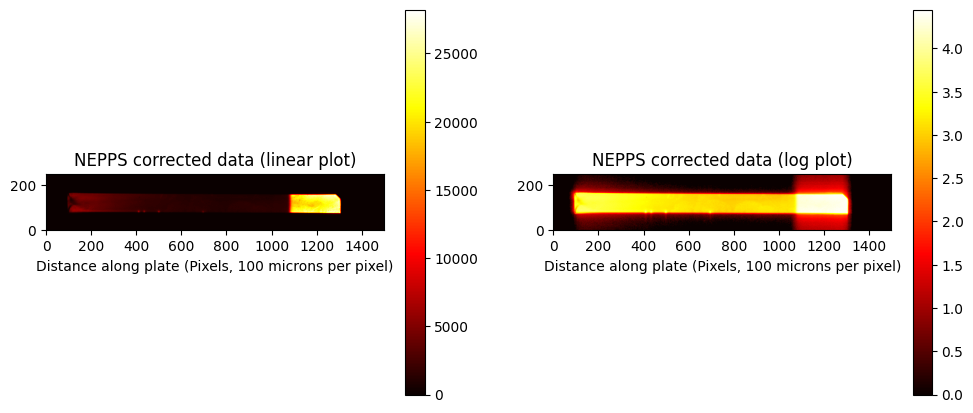

In [4]:
import h5py
import numpy as np
import cv2

with h5py.File('PLATE_1_SHOT_29.h5', "r") as f:

    base_items = list(f.items())
    #print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    #print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/PSL_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    #print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/PSL_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    #print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    #print(type(shot_data))

    x_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    import matplotlib.pyplot as plt

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('Distance along plate (Pixels, 100 microns per pixel)')
    #axs[0].set_ylabel('Position along width of plate (Pixels)')
    axs[0].set_title('NEPPS corrected data (linear plot)')
    plt.colorbar(im1, ax=axs[0], label='')

    im2 = axs[1].imshow((1/np.log(10))*np.log(np.abs(shot_data+1)), cmap='hot', origin='lower')
    axs[1].set_xlabel('Distance along plate (Pixels, 100 microns per pixel)')
    #axs[1].set_ylabel('Position along width of plate (Pixels)')
    axs[1].set_title('NEPPS corrected data (log plot)')
    plt.colorbar(im2, ax=axs[1], label='')

NEPPS_1_29= shot_data
x_1_29_axis = x_axis

96.96670344
1065
994.1974
464
829
[1.19688428e+05 1.81807404e-02 1.13314276e+03]
Temperature 1 =  55.00326063230884
Temperature 2 =  35.902056795981196
Temperature 3 =  232.72001532942403
[2.78632409e+05 2.78535574e-02 1.79744696e+04 4.29700900e-03
 8.94777649e+02]
-797.71799212432


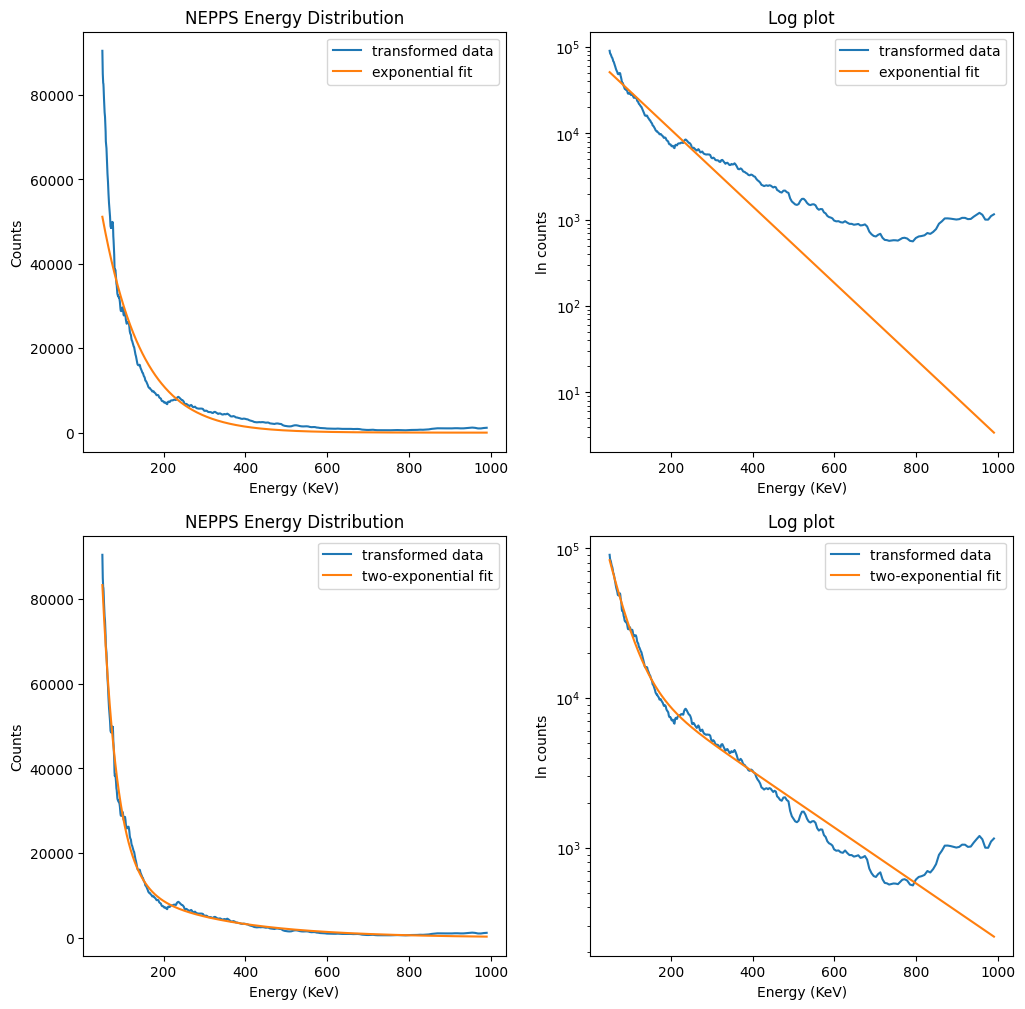

In [5]:
import numpy as np

edge = 95

line = lineout(NEPPS_1_29, 95, 150)
E_axis = transform_proton_axis(x_1_29_axis-edge,10)
proton_PSL_scale = TR_proton_PSL_scale(E_axis)
#proton_PSL_scale = MS_proton_PSL_scale(E_axis)

index = (np.append((np.append(np.linspace(391,420,29),np.linspace(426,449,23))),np.linspace(489,503,14))).astype(int)
E_axis_featureless = np.delete(E_axis,index, None)
line_featureless = np.delete(line,index, None)
proton = np.delete(proton_PSL_scale,index, None)

#plt.plot(E_axis_featureless,np.divide(line_featureless-1402,proton))

#plt.ylim([0,200000])
#plt.xlim([50,500])

#TR film analysis
start_i, end_i = find_index(E_axis,50,1000)

#start_i, end_i = find_index(E_axis,550,2000)

#############################################

signal_min = np.min(line[start_i:end_i])
print(signal_min)

print(start_i)
print(end_i)

ther_1, pcov_1 = curve_fit(find_exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[7e+05, 4e-03, 1e+02], bounds=(0, np.inf))
ther_1a, pcov_1a = curve_fit(find_exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[7e+05, 4e-03, 1e+02], bounds=(0, [np.inf,np.inf,0.9*signal_min]))
fit1 = find_exp_proton(E_axis, ther_1[0], ther_1[1], ther_1[2])
fit1_exp = find_exp(E_axis, ther_1[0], ther_1[1])
fit1a_exp = find_exp(E_axis, ther_1a[0], ther_1a[1])

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_1a[2]),proton_PSL_scale[start_i:end_i]),label='transformed data')
axs[0,0].plot(E_axis[start_i:end_i],fit1a_exp[start_i:end_i],label='exponential fit')
axs[0,0].set_xlabel("Energy (KeV)")
axs[0,0].set_ylabel("Counts")
axs[0,0].set_title("NEPPS Energy Distribution")
axs[0,0].legend()

axs[0,1].semilogy(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_1a[2]),proton_PSL_scale[start_i:end_i]),label='transformed data')
axs[0,1].semilogy(E_axis[start_i:end_i],fit1a_exp[start_i:end_i],label='exponential fit')
axs[0,1].set_xlabel("Energy (KeV)")
axs[0,1].set_ylabel("ln counts")
axs[0,1].set_title("Log plot")
axs[0,1].legend()

#plt.plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_1[2]),proton_PSL_scale[start_i:end_i]))

#plt.plot(E_axis[start_i:end_i],fit1_exp[start_i:end_i])

#axs[1].plot(E_axis,np.divide((line-ther_1[2]),proton_PSL_scale))

#axs[1].plot(E_axis,fit1_exp)

#axs[1].set_ylim([-5000,120000])
#axs[1].set_xlim([0,30000])

#ther_2, pcov_2 = curve_fit(find_2exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[7*ther_1[0], 7*ther_1[1], 0.01*ther_1[0], 0.01*ther_1[1], ther_1[2]], bounds=(0, np.inf))
ther_2, pcov_2 = curve_fit(find_2exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[7*ther_1a[0], 7*ther_1a[1], 0.01*ther_1a[0], 0.01*ther_1a[1], ther_1a[2]], bounds=(0, [np.inf,np.inf,np.inf,np.inf,0.9*signal_min]))
#ther_1, pcov_1 = curve_fit(find_exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[5e+05, 1e-02, 1e+02], bounds=(0, [np.inf,np.inf,signal_min]))
fit2 = find_2exp_proton(E_axis, ther_2[0], ther_2[1], ther_2[2], ther_2[3], ther_2[4])
fit2_exp = find_2exp(E_axis, ther_2[0], ther_2[1], ther_2[2], ther_2[3])

#axs[1].plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_2[4]),proton_PSL_scale[start_i:end_i]),label='transformed data')
#axs[1].plot(E_axis[start_i:end_i],fit2_exp[start_i:end_i],label='two-exponential fit')

axs[1,0].plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_2[4]),proton_PSL_scale[start_i:end_i]),label='transformed data')
axs[1,0].plot(E_axis[start_i:end_i],fit2_exp[start_i:end_i],label='two-exponential fit')
axs[1,0].set_xlabel("Energy (KeV)")
axs[1,0].set_ylabel("Counts")
axs[1,0].set_title("NEPPS Energy Distribution")
axs[1,0].legend()

axs[1,1].semilogy(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_2[4]),proton_PSL_scale[start_i:end_i]),label='transformed data')
axs[1,1].semilogy(E_axis[start_i:end_i],fit2_exp[start_i:end_i],label='two-exponential fit')
axs[1,1].set_xlabel("Energy (KeV)")
axs[1,1].set_ylabel("ln counts")
axs[1,1].set_title("Log plot")
axs[1,1].legend()


print(ther_1)

print("Temperature 1 = ", 1/ther_1[1])
print("Temperature 2 = ", 1/ther_2[1])
print("Temperature 3 = ", 1/ther_2[3])

print(ther_2)
print(np.min(np.divide(line[start_i:end_i]-ther_1[2],proton_PSL_scale[start_i:end_i])))


96.96670344
970
[  28.726072   47.721012   63.93761   126.354355  235.88556  1539.4694
 2527.5945   2967.5762   2759.252    2198.3623  ]


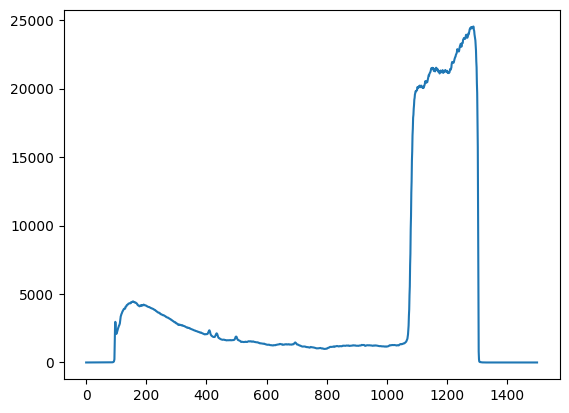

In [6]:
line = lineout(NEPPS_1_29, 80, 150)
E_axis = transform_proton_axis(x_1_29_axis,10)
proton_PSL_scale = TR_proton_PSL_scale(E_axis)
#plt.plot(E_axis,10000*proton_PSL_scale)
#plt.plot(E_axis,line)
plt.plot(x_1_29_axis,line)
#plt.ylim([0,50000])
#plt.xlim([155,165])
print(line[90:100])

#pixel 95 is where the strip starts

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


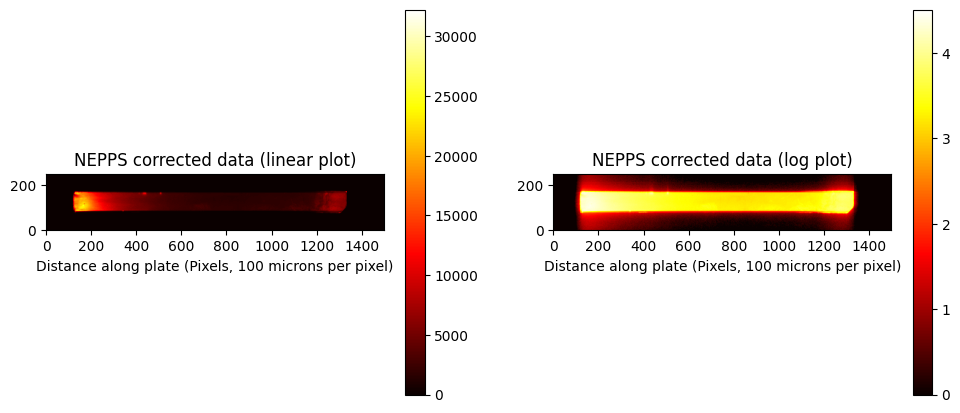

In [7]:
import h5py
import numpy as np
import cv2

with h5py.File('PLATE_2_SHOT_29.h5', "r") as f:

    base_items = list(f.items())
    #print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    #print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/PSL_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    #print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/PSL_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    #print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    #print(type(shot_data))

    x_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    import matplotlib.pyplot as plt

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('Distance along plate (Pixels, 100 microns per pixel)')
    #axs[0].set_ylabel('Position along width of plate (Pixels)')
    axs[0].set_title('NEPPS corrected data (linear plot)')
    plt.colorbar(im1, ax=axs[0], label='')

    im2 = axs[1].imshow((1/np.log(10))*np.log(np.abs(shot_data+1)), cmap='hot', origin='lower')
    axs[1].set_xlabel('Distance along plate (Pixels, 100 microns per pixel)')
    #axs[1].set_ylabel('Position along width of plate (Pixels)')
    axs[1].set_title('NEPPS corrected data (log plot)')
    plt.colorbar(im2, ax=axs[1], label='')

NEPPS_2_29= shot_data
x_2_29_axis = x_axis

103.4301408
1153
1382.1794
143
983
[3.98725122e+05 2.33690145e-04 1.59527312e+03]
[3.97095113e+05 2.33035753e-04 2.36292931e+04 2.90634213e-08
 9.67525610e+02]
Temperature 1 =  4279.170607528651
Temperature 2 =  4291.187026622289
Temperature 3 =  34407511.408371605
-1307.7427111825264


C:\Users\rayne\AppData\Local\Temp\ipykernel_27912\3165875953.py:74: RuntimeWarning: divide by zero encountered in divide
  print(np.min(np.divide(line[start_i:end_i]-ther_1[2],proton_PSL_scale[start_i:end_i])))


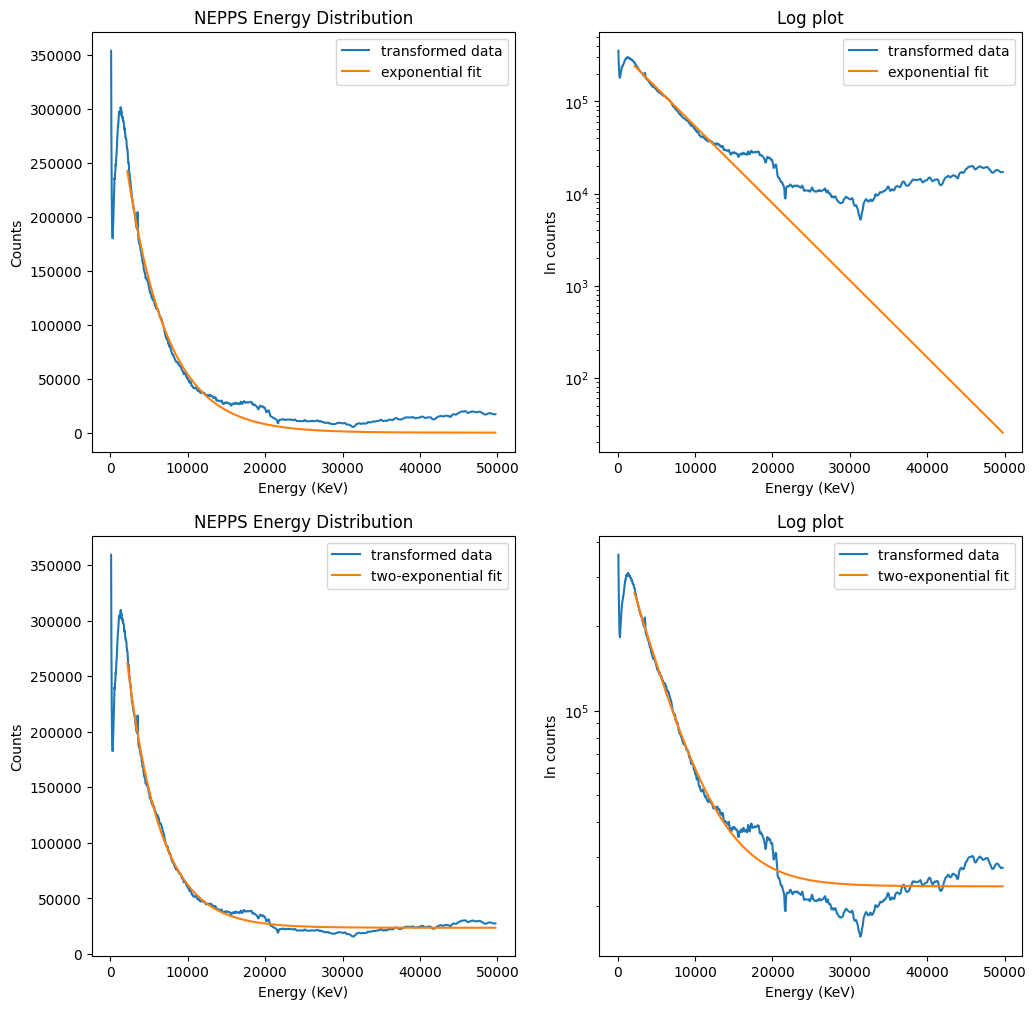

In [8]:
import numpy as np
edge = 119
line = lineout(NEPPS_2_29, 80, 150)
E_axis = transform_electron_axis(x_2_29_axis-edge,10)
electron_PSL_scale = MS_PSL_scale(E_axis)

#plt.plot(E_axis_featureless,np.divide(line_featureless-1402,proton))

#plt.ylim([0,200000])
#plt.xlim([50,500])

start_i, end_i = find_index(E_axis,100,50000)
strt, ed = find_index(E_axis,2200,10000)

#############################################

signal_min = np.min(line[start_i:end_i])
print(signal_min)

print(start_i)
print(end_i)


ther_1, pcov_1 = curve_fit(find_exp_electron, E_axis[strt:end_i], line[strt:end_i], p0=[5e+06, 1e-03, 1e+02], bounds=(0, np.inf))
ther_1a, pcov_1a = curve_fit(find_exp_electron, E_axis[strt:end_i], line[strt:end_i], p0=[5e+06, 1e-03, 1e+02], bounds=(0, [np.inf,np.inf,0.9*signal_min]))
fit1 = find_exp_electron(E_axis, ther_1[0], ther_1[1], ther_1[2])
fit1_exp = find_exp(E_axis, ther_1[0], ther_1[1])
fit1a_exp = find_exp(E_axis, ther_1a[0], ther_1a[1])

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_1a[2]),electron_PSL_scale[start_i:end_i]),label='transformed data')
axs[0,0].plot(E_axis[strt:end_i],fit1a_exp[strt:end_i],label='exponential fit')
axs[0,0].set_xlabel("Energy (KeV)")
axs[0,0].set_ylabel("Counts")
axs[0,0].set_title("NEPPS Energy Distribution")
axs[0,0].legend()

axs[0,1].semilogy(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_1a[2]),electron_PSL_scale[start_i:end_i]),label='transformed data')
axs[0,1].semilogy(E_axis[strt:end_i],fit1a_exp[strt:end_i],label='exponential fit')
axs[0,1].set_xlabel("Energy (KeV)")
axs[0,1].set_ylabel("ln counts")
axs[0,1].set_title("Log plot")
axs[0,1].legend()

ther_2, pcov_2 = curve_fit(find_2exp_electron, E_axis[strt:end_i], line[strt:end_i], p0=[7*ther_1a[0], 7*ther_1a[1], 0.008*ther_1a[0], 0.01*ther_1a[1], ther_1a[2]], bounds=([0,0,0,0,0.7*signal_min], [np.inf,np.inf,np.inf,np.inf,0.9*signal_min]))
#ther_1, pcov_1 = curve_fit(find_exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[5e+05, 1e-02, 1e+02], bounds=(0, [np.inf,np.inf,signal_min]))
fit2 = find_2exp_electron(E_axis, ther_2[0], ther_2[1], ther_2[2], ther_2[3], ther_2[4])
fit2_exp = find_2exp(E_axis, ther_2[0], ther_2[1], ther_2[2], ther_2[3])


axs[1,0].plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_2[4]),electron_PSL_scale[start_i:end_i]),label='transformed data')
axs[1,0].plot(E_axis[strt:end_i],fit2_exp[strt:end_i],label='two-exponential fit')
axs[1,0].set_xlabel("Energy (KeV)")
axs[1,0].set_ylabel("Counts")
axs[1,0].set_title("NEPPS Energy Distribution")
axs[1,0].legend()

axs[1,1].semilogy(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_2[4]),electron_PSL_scale[start_i:end_i]),label='transformed data')
axs[1,1].semilogy(E_axis[strt:end_i],fit2_exp[strt:end_i],label='two-exponential fit')
axs[1,1].set_xlabel("Energy (KeV)")
axs[1,1].set_ylabel("ln counts")
axs[1,1].set_title("Log plot")
axs[1,1].legend()


print(ther_1)
print(ther_2)

print("Temperature 1 = ", 1/ther_1[1])
print("Temperature 2 = ", 1/ther_2[1])
print("Temperature 3 = ", 1/ther_2[3])

print(np.min(np.divide(line[start_i:end_i]-ther_1[2],proton_PSL_scale[start_i:end_i])))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


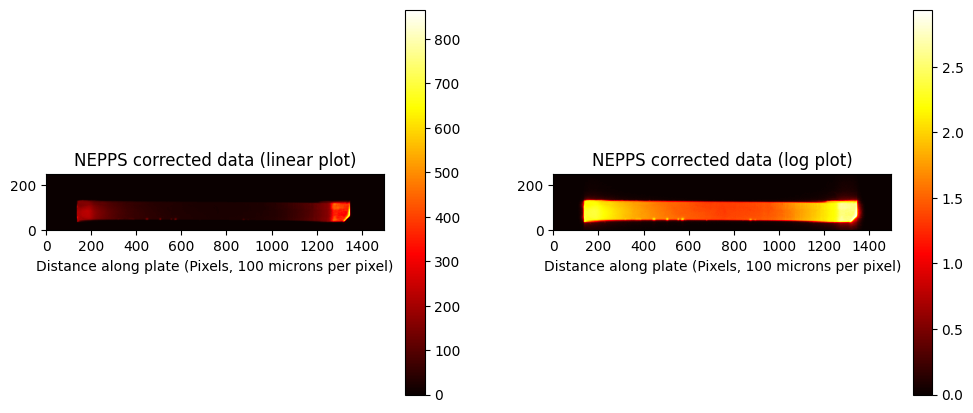

In [9]:
import h5py
import numpy as np
import cv2

with h5py.File('PLATE_6_SHOT_28.h5', "r") as f:

    base_items = list(f.items())
    #print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    #print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/PSL_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    #print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/PSL_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    #print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    #print(type(shot_data))

    x_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    import matplotlib.pyplot as plt

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('Distance along plate (Pixels, 100 microns per pixel)')
    #axs[0].set_ylabel('Position along width of plate (Pixels)')
    axs[0].set_title('NEPPS corrected data (linear plot)')
    plt.colorbar(im1, ax=axs[0], label='')

    im2 = axs[1].imshow((1/np.log(10))*np.log(np.abs(shot_data+1)), cmap='hot', origin='lower')
    axs[1].set_xlabel('Distance along plate (Pixels, 100 microns per pixel)')
    #axs[1].set_ylabel('Position along width of plate (Pixels)')
    axs[1].set_title('NEPPS corrected data (log plot)')
    plt.colorbar(im2, ax=axs[1], label='')

NEPPS_6_28= shot_data
x_6_28_axis = x_axis

103.4301408
1170
12.23121
160
853
[2.49136254e+03 2.46122364e-04 1.29257588e+01]
[2.38508896e+03 3.04900225e-04 3.87931726e+02 7.56309478e-05
 1.10080888e+01]
Temperature 1 =  4063.0196480915956
Temperature 2 =  3279.76143604076
Temperature 3 =  13222.100591506936
-2.7269987332519006


C:\Users\rayne\AppData\Local\Temp\ipykernel_27912\710997706.py:74: RuntimeWarning: divide by zero encountered in divide
  print(np.min(np.divide(line[start_i:end_i]-ther_1[2],proton_PSL_scale[start_i:end_i])))


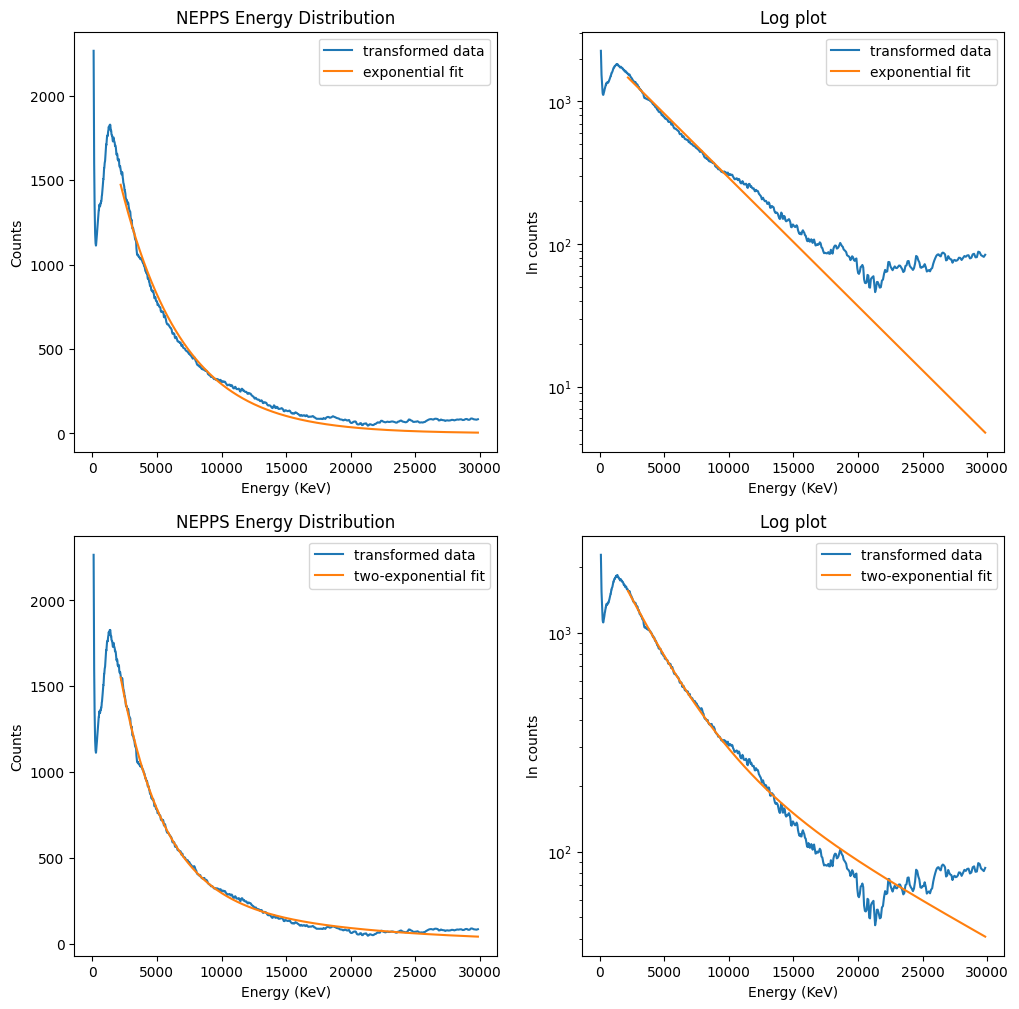

In [10]:
import numpy as np
edge = 136
line = lineout(NEPPS_6_28, 80, 150)
E_axis = transform_electron_axis(x_2_29_axis-edge,10)
electron_PSL_scale = MS_PSL_scale(E_axis)

#plt.plot(E_axis_featureless,np.divide(line_featureless-1402,proton))

#plt.ylim([0,200000])
#plt.xlim([50,500])

start_i, end_i = find_index(E_axis,100,30000)
strt, ed = find_index(E_axis,2200,10000)

#############################################

signal_min = np.min(line[start_i:end_i])
print(signal_min)

print(start_i)
print(end_i)


ther_1, pcov_1 = curve_fit(find_exp_electron, E_axis[strt:end_i], line[strt:end_i], p0=[2e+04, 2e-04, 1e+01], bounds=(0, np.inf))
ther_1a, pcov_1a = curve_fit(find_exp_electron, E_axis[strt:end_i], line[strt:end_i], p0=[2e+04, 2e-04, 1e+01], bounds=(0, [np.inf,np.inf,0.9*signal_min]))
fit1 = find_exp_electron(E_axis, ther_1[0], ther_1[1], ther_1[2])
fit1_exp = find_exp(E_axis, ther_1[0], ther_1[1])
fit1a_exp = find_exp(E_axis, ther_1a[0], ther_1a[1])

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_1a[2]),electron_PSL_scale[start_i:end_i]),label='transformed data')
axs[0,0].plot(E_axis[strt:end_i],fit1a_exp[strt:end_i],label='exponential fit')
axs[0,0].set_xlabel("Energy (KeV)")
axs[0,0].set_ylabel("Counts")
axs[0,0].set_title("NEPPS Energy Distribution")
axs[0,0].legend()

axs[0,1].semilogy(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_1a[2]),electron_PSL_scale[start_i:end_i]),label='transformed data')
axs[0,1].semilogy(E_axis[strt:end_i],fit1a_exp[strt:end_i],label='exponential fit')
axs[0,1].set_xlabel("Energy (KeV)")
axs[0,1].set_ylabel("ln counts")
axs[0,1].set_title("Log plot")
axs[0,1].legend()

ther_2, pcov_2 = curve_fit(find_2exp_electron, E_axis[strt:end_i], line[strt:end_i], p0=[7*ther_1a[0], 7*ther_1a[1], 0.008*ther_1a[0], 0.01*ther_1a[1], ther_1a[2]], bounds=([0,0,0,0,0.7*signal_min], [np.inf,np.inf,np.inf,np.inf,0.9*signal_min]))
#ther_1, pcov_1 = curve_fit(find_exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[5e+05, 1e-02, 1e+02], bounds=(0, [np.inf,np.inf,signal_min]))
fit2 = find_2exp_electron(E_axis, ther_2[0], ther_2[1], ther_2[2], ther_2[3], ther_2[4])
fit2_exp = find_2exp(E_axis, ther_2[0], ther_2[1], ther_2[2], ther_2[3])


axs[1,0].plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_2[4]),electron_PSL_scale[start_i:end_i]),label='transformed data')
axs[1,0].plot(E_axis[strt:end_i],fit2_exp[strt:end_i],label='two-exponential fit')
axs[1,0].set_xlabel("Energy (KeV)")
axs[1,0].set_ylabel("Counts")
axs[1,0].set_title("NEPPS Energy Distribution")
axs[1,0].legend()

axs[1,1].semilogy(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_2[4]),electron_PSL_scale[start_i:end_i]),label='transformed data')
axs[1,1].semilogy(E_axis[strt:end_i],fit2_exp[strt:end_i],label='two-exponential fit')
axs[1,1].set_xlabel("Energy (KeV)")
axs[1,1].set_ylabel("ln counts")
axs[1,1].set_title("Log plot")
axs[1,1].legend()


print(ther_1)
print(ther_2)

print("Temperature 1 = ", 1/ther_1[1])
print("Temperature 2 = ", 1/ther_2[1])
print("Temperature 3 = ", 1/ther_2[3])

print(np.min(np.divide(line[start_i:end_i]-ther_1[2],proton_PSL_scale[start_i:end_i])))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


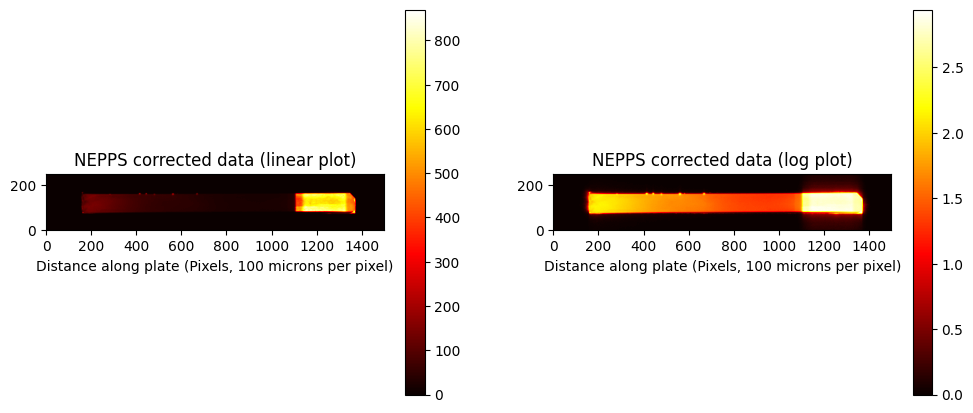

In [11]:
import h5py
import numpy as np
import cv2

with h5py.File('PLATE_7_SHOT_28.h5', "r") as f:

    base_items = list(f.items())
    #print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    #print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/PSL_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    #print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/PSL_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    #print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    #print(type(shot_data))

    x_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    import matplotlib.pyplot as plt

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('Distance along plate (Pixels, 100 microns per pixel)')
    #axs[0].set_ylabel('Position along width of plate (Pixels)')
    axs[0].set_title('NEPPS corrected data (linear plot)')
    plt.colorbar(im1, ax=axs[0], label='')

    im2 = axs[1].imshow((1/np.log(10))*np.log(np.abs(shot_data+1)), cmap='hot', origin='lower')
    axs[1].set_xlabel('Distance along plate (Pixels, 100 microns per pixel)')
    #axs[1].set_ylabel('Position along width of plate (Pixels)')
    axs[1].set_title('NEPPS corrected data (log plot)')
    plt.colorbar(im2, ax=axs[1], label='')

NEPPS_7_28= shot_data
x_7_28_axis = x_axis

96.96670344
1129
20.641817
528
893
[5.41168185e+03 1.60790962e-02 2.29327696e+01]
[8.41116505e+03 2.36053096e-02 8.24838662e+02 6.17715647e-03
 1.85776354e+01]
Temperature 1 =  62.19255019939785
Temperature 2 =  42.36335027969381
Temperature 3 =  161.88678469355742
-10.698596501836018


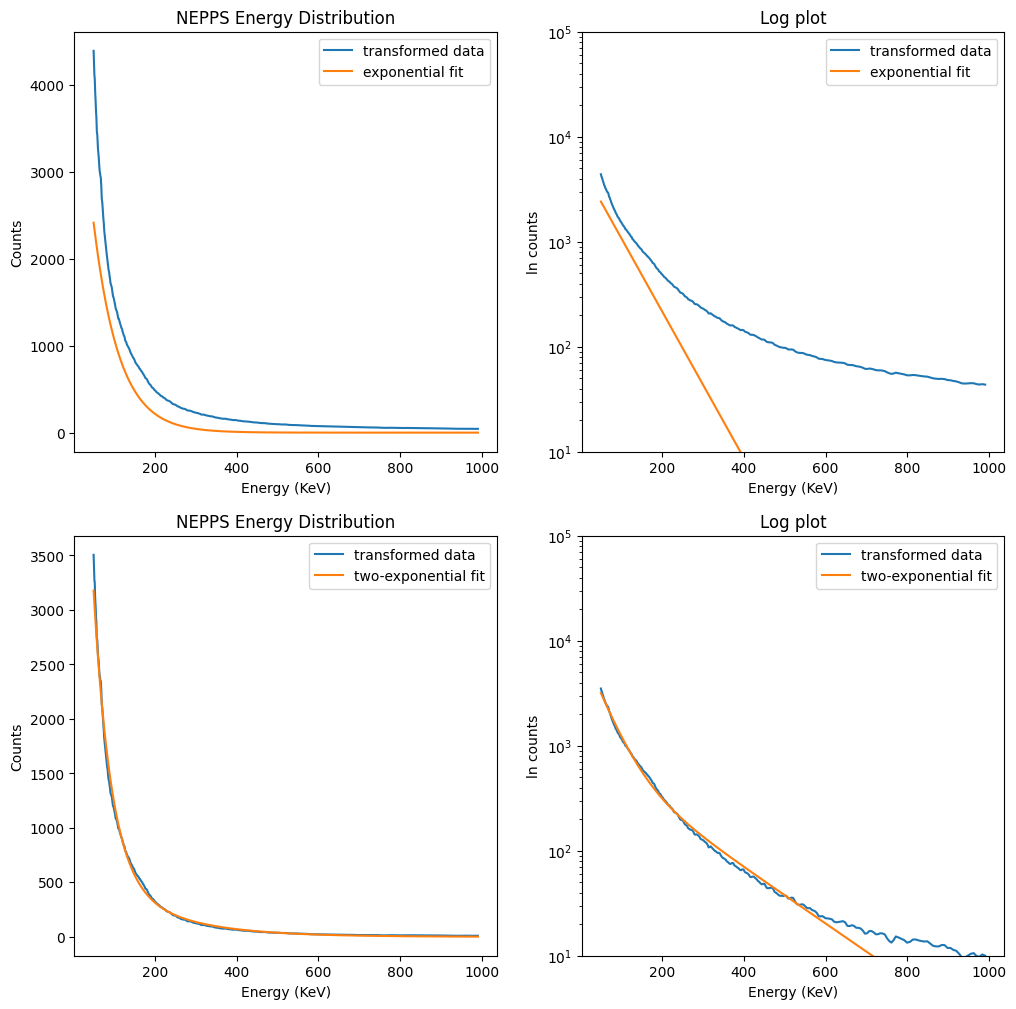

In [12]:
import numpy as np

edge = 159

line = lineout(NEPPS_7_28, 95, 150)
E_axis = transform_proton_axis(x_1_29_axis-edge,10)
proton_PSL_scale = TR_proton_PSL_scale(E_axis)

index = (np.append((np.append(np.linspace(391,420,29),np.linspace(426,449,23))),np.linspace(489,503,14))).astype(int)
E_axis_featureless = np.delete(E_axis,index, None)
line_featureless = np.delete(line,index, None)
proton = np.delete(proton_PSL_scale,index, None)

#plt.plot(E_axis_featureless,np.divide(line_featureless-1402,proton))

#plt.ylim([0,200000])
#plt.xlim([50,500])

start_i, end_i = find_index(E_axis,50,1000)
#start_1, end_2

#############################################

signal_min = np.min(line[start_i:end_i])
print(signal_min)

print(start_i)
print(end_i)

ther_1, pcov_1 = curve_fit(find_exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[8.3e+03, 2.3e-02, 1.8e+01], bounds=(0, np.inf))
#print(ther_1)
#ther_1a, pcov_1a = curve_fit(find_exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[5.4e+03, 1.6e-02, 23], bounds=(0, [np.inf,np.inf,0.9*signal_min]))
fit1 = find_exp_proton(E_axis, ther_1[0], ther_1[1], ther_1[2])
fit1_exp = find_exp(E_axis, ther_1[0], ther_1[1])
fit1a_exp = find_exp(E_axis, ther_1a[0], ther_1a[1])

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_1a[2]),proton_PSL_scale[start_i:end_i]),label='transformed data')
axs[0,0].plot(E_axis[start_i:end_i],fit1_exp[start_i:end_i],label='exponential fit')
axs[0,0].set_xlabel("Energy (KeV)")
axs[0,0].set_ylabel("Counts")
axs[0,0].set_title("NEPPS Energy Distribution")
axs[0,0].legend()

axs[0,1].semilogy(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_1a[2]),proton_PSL_scale[start_i:end_i]),label='transformed data')
axs[0,1].semilogy(E_axis[start_i:end_i],fit1_exp[start_i:end_i],label='exponential fit')
axs[0,1].set_xlabel("Energy (KeV)")
axs[0,1].set_ylabel("ln counts")
axs[0,1].set_title("Log plot")
axs[0,1].set_ylim([10,100000])
axs[0,1].legend()

#plt.plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_1[2]),proton_PSL_scale[start_i:end_i]))

#plt.plot(E_axis[start_i:end_i],fit1_exp[start_i:end_i])

#axs[1].plot(E_axis,np.divide((line-ther_1[2]),proton_PSL_scale))

#axs[1].plot(E_axis,fit1_exp)

#axs[1].set_ylim([-5000,120000])
#axs[1].set_xlim([0,30000])

#ther_2, pcov_2 = curve_fit(find_2exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[7*ther_1[0], 7*ther_1[1], 0.01*ther_1[0], 0.01*ther_1[1], ther_1[2]], bounds=(0, np.inf))
ther_2, pcov_2 = curve_fit(find_2exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[5*ther_1a[0], 5*ther_1a[1], 0.7*ther_1a[0], 0.01*ther_1a[1], ther_1a[2]], bounds=(0, [np.inf,np.inf,np.inf,np.inf,0.9*signal_min]))
#ther_1, pcov_1 = curve_fit(find_exp_proton, E_axis[start_i:end_i], line[start_i:end_i], p0=[5e+05, 1e-02, 1e+02], bounds=(0, [np.inf,np.inf,signal_min]))
fit2 = find_2exp_proton(E_axis, ther_2[0], ther_2[1], ther_2[2], ther_2[3], ther_2[4])
fit2_exp = find_2exp(E_axis, ther_2[0], ther_2[1], ther_2[2], ther_2[3])

#axs[1].plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_2[4]),proton_PSL_scale[start_i:end_i]),label='transformed data')
#axs[1].plot(E_axis[start_i:end_i],fit2_exp[start_i:end_i],label='two-exponential fit')

axs[1,0].plot(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_2[4]),proton_PSL_scale[start_i:end_i]),label='transformed data')
axs[1,0].plot(E_axis[start_i:end_i],fit2_exp[start_i:end_i],label='two-exponential fit')
axs[1,0].set_xlabel("Energy (KeV)")
axs[1,0].set_ylabel("Counts")
axs[1,0].set_title("NEPPS Energy Distribution")
axs[1,0].legend()

axs[1,1].semilogy(E_axis[start_i:end_i],np.divide((line[start_i:end_i]-ther_2[4]),proton_PSL_scale[start_i:end_i]),label='transformed data')
axs[1,1].semilogy(E_axis[start_i:end_i],fit2_exp[start_i:end_i],label='two-exponential fit')
axs[1,1].set_xlabel("Energy (KeV)")
axs[1,1].set_ylabel("ln counts")
axs[1,1].set_title("Log plot")
axs[1,1].set_ylim([10,100000])
axs[1,1].legend()

print(ther_1)
print(ther_2)

print("Temperature 1 = ", 1/ther_1[1])
print("Temperature 2 = ", 1/ther_2[1])
print("Temperature 3 = ", 1/ther_2[3])

print(np.min(np.divide(line[start_i:end_i]-ther_1[2],proton_PSL_scale[start_i:end_i])))